## Import and directories

In [1]:
#directories
import os
try:
    parentdir
except NameError:
    parentdir=os.getcwd()
else:
    parentdir = parentdir
homedir=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S101d14Feb17_60.5_635_A2_CuAzu655';#data directory
print('The working directory is parentdir: %s' %parentdir)
print('The data directory is homedir: %s' %homedir)

The working directory is parentdir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Analysis
The data directory is homedir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/201702_S101toS104/S101d14Feb17_60.5_635_A2_CuAzu655


In [2]:
#Import modules
import os.path
import glob
import os
import re
from xlwt import Workbook

import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from numpy import sqrt, pi, exp, linspace, loadtxt

from pylab import *
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Figure Parameters

In [3]:
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "14"

## Python .py run

In [3]:
os.chdir(parentdir)
!python Analysis_CuAz_April2017.py
%run Analysis_CuAz_April2017.py

In [19]:
#Run this once to run the .py file.
os.chdir(parentdir)
!python Analysis_bis.py
%run Analysis_bis.py

## List of points

In [5]:
point_list(foldername=homedir)

,Point_1,Point_3,Point_4,Point_5,Point_6,Point_7,Point_8,Point_9,Point_10,Point_11,Point_12,Point_14,Point_15,Point_16,Point_18,Point_19
0,0,0,0,0,0,0,25,0,0,0,0.0,0,0,0,0,0
1,15,25,15,50,25,25,,15,100,15,10.0,,,10,10,25
2,20,75,20,,25,50,,20,,20,15.0,,,25,15,25
3,25,100,25,,50,75,,25,,25,20.0,,,45,20,50
4,35,,35,,60,100,,25,,25,25.0,,,50,25,100
5,40,,40,,75,,,35,,35,25.0,,,60,25,
6,50,,50,,100,,,40,,40,35.0,,,100,35,
7,55,,55,,,,,50,,50,40.0,,,,40,
8,60,,75,,,,,55,,55,45.0,,,,45,
9,75,,90,,,,,60,,60,50.0,,,,50,


### Check missing files

In [6]:
check_missingFCSfiles(foldername=homedir)

/home/biswajit/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:804: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


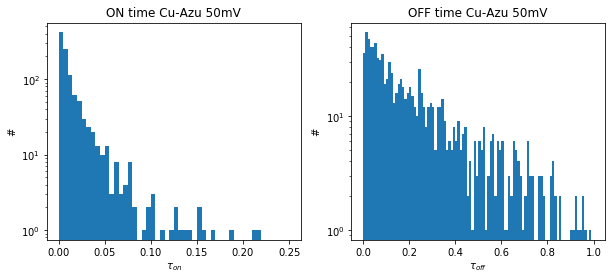

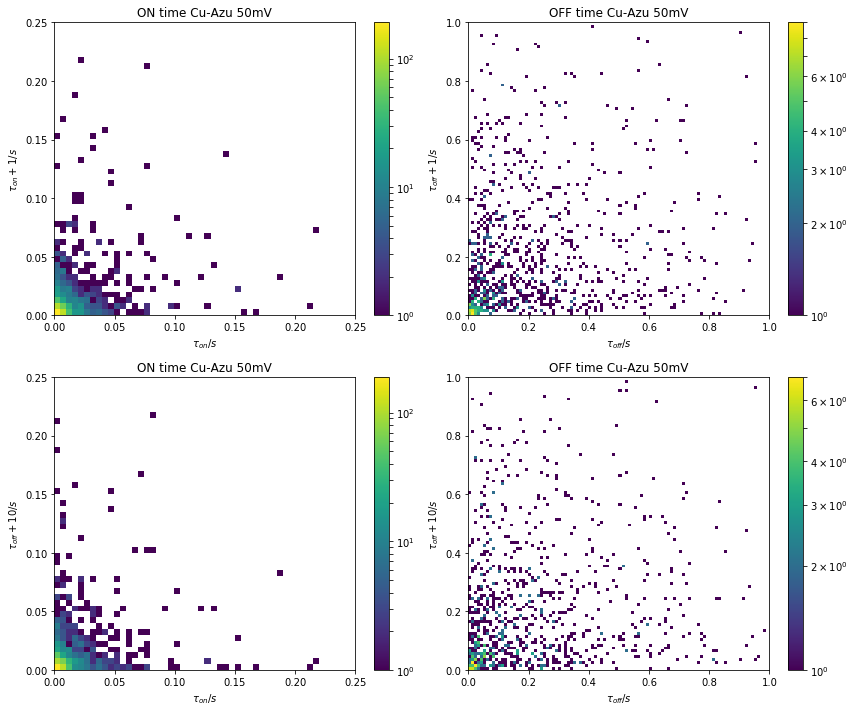

In [4]:
#*************Analysis for a specific potential********************

titel = 'average_on_and_off_time_specific_mV_Cu.xls' #name excell output file
pointnumbers = 31 #Change this to the minimal amount of points
pot = 18 #number of potentials
specific_potential = 50 #the specific potential you want the plots for
onMax=0.25;offMax=1;
rnge_on = [[0,onMax], [0,onMax]] #range on histograms, form: [[0,0.25], [0,0.25]] --> [xrange], [yrange]
rnge_off = [[0,offMax], [0,offMax]] #range off histograms
bins_on = 50  #bins for the on histograms
bins_off = 100 #bins for the off histograms
proteins = 'Cu' #change this to 'Zn' or 'Cu' depending on which files you are analysing. Changes title of plots.
current_dir = homedir#'S101d14Feb17_60.5_635_A2_CuAzu655' #foldername you want to work in.
max_his_on = onMax
max_his_off = offMax
x_shift = 10 # t vs  t + x_shift 

histograms(pot, pointnumbers, specific_potential, rnge_on, rnge_off, bins_on, bins_off, proteins, current_dir, max_his_on, max_his_off, x_shift, plots=True);

## Time trace plot

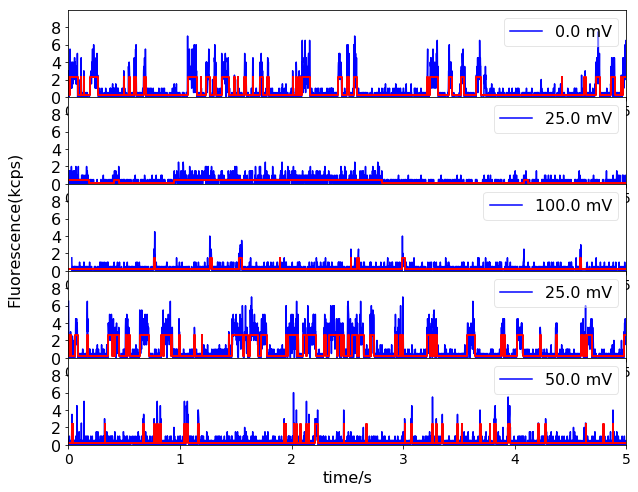

In [31]:
# folderpath = r'D:\Research\Experimental\Analysis\2017analysis\201702\Analysis_Sebby_March_2017\S101d14Feb17_60.5_635_A2_CuAzu655'
fig = time_trace_plot(foldername= homedir, input_potential=[0, 25, 50, 100], pointnumbers=[19], x_lim_min=0, y_lim_min=0, x_lim_max=5, y_lim_max=10, bin=2, show_changepoint=True)

## FCS plot

### Aexp(-t/t_ac)

(5.6149517615976183, 11.135664739515827, 0.50423139461737732)

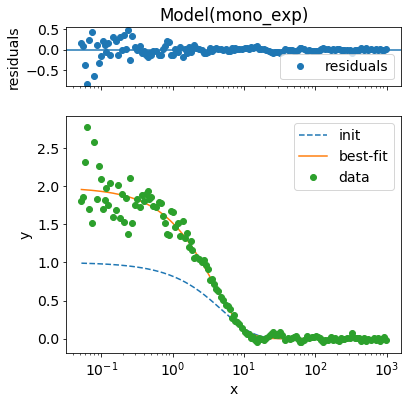

In [22]:
df_datn_em_specific, df_fcs_specific = get_point_specifics(foldername= homedir, input_potential=[90], pointnumbers=[1])
df_fcs=df_fcs_specific['filepath[FCS]'][0]
df_emplot = df_datn_em_specific['filepath[.em.plot]'][0]
df_datn = df_datn_em_specific['filepath[.datn]'][0]
def FCS_mono_fit(df_fcs,df_emplot, tmin=0.05,tmax=1000):
    df_fcs = pd.read_csv(df_fcs, index_col=False, names=None, skiprows=1, header=None, sep='\s+');
    df_fcs = df_fcs[df_fcs[0]>=tmin];
    df_fcs = df_fcs[df_fcs[0]<=tmax];
    xdata=df_fcs[0];
    ydata=df_fcs[1];
    df_em = pd.read_csv(df_emplot, header=None, sep='\t')#changepoint
    S=max(df_em[1]);
    Bkr=min(df_em[1]);
    correction_BG = (S/(S+Bkr))**2
    ydata= ((ydata)/correction_BG)
    def mono_exp(x, A, t_ac, t_rise):
        return A*exp(-x/t_ac)
    gmodel = Model(mono_exp)
    gmodel.set_param_hint('A', value=1, min=0.05, max=100)
    gmodel.set_param_hint('t_ac', value=5, min=1, max=100)
    gmodel.set_param_hint('t_rise', value=5, min=1, max=100)
    pars = gmodel.make_params()
    result = gmodel.fit(ydata, pars, x=xdata)#, A=1, B=1, t_ac=1
    A = result.best_values['A']
    t_ac = result.best_values['t_ac']
    toff = t_ac*(1+A); ton = t_ac*(1+(1/A));
    tratio_on_off = ton/toff
    return(ton, toff, tratio_on_off, result)#, t_on_err, t_off_err
ton, toff, tratio_on_off, result = FCS_mono_fit(df_fcs, df_emplot)
result.plot()
xscale('log')
ton, toff, tratio_on_off

## Time trace output folderwise

In [27]:
out_total = timetrace_outputs_folderwise(folderpath=homedir, pointnumbers=range(50), potentialist=potentialist)
out_total

Point_1                                                           \
   Potential t_ratio_timetrace                                          
   Potential            t_onav t_onaverr t_offav t_offaverr   t_ratio   
0        0.0             42.32     13.90  154.63      51.15  0.273686   
1       15.0             30.04      6.57   60.99      13.38  0.492540   
2       20.0             23.06      5.26   74.90      17.14  0.307877   
3       25.0             22.86      5.10   71.20      15.95  0.321067   
4       35.0             24.54      6.07   90.63      22.50  0.270771   
5       40.0             20.36      5.05   96.83      24.13  0.210265   
6       50.0              3.75      1.52  260.72     106.86  0.014383   
7       55.0             17.81      5.27  144.02      42.87  0.123663   
8       60.0             12.02      3.44  141.88      40.85  0.084719   
9       75.0              7.17      2.33  185.63      60.76  0.038625   
10      90.0              5.04      1.66  193.57      64.03  0.026037   
11     100.0              8.73      6.74  522.25     419.70  0.016716   
12       NaN               NaN       NaN     NaN        NaN       NaN   
13       NaN               NaN       NaN     NaN        NaN       NaN   
14       NaN               NaN       NaN     NaN        NaN       NaN   
15       NaN               NaN       NaN     NaN        NaN       NaN   
16       NaN               NaN       NaN     NaN        NaN       NaN   

                Point_3                                ...      \
              Potential t_ratio_timetrace              ...       
   t_ratioerr Potential            t_onav t_onaverr    ...       
0    0.127580       0.0             46.70     15.29    ...       
1    0.152577      25.0            102.01     51.40    ...       
2    0.099477      75.0             10.93      4.25    ...       
3    0.101508     100.0              5.09      2.59    ...       
4    0.094892       NaN               NaN       NaN    ...       
5    0.073929       NaN               NaN       NaN    ...       
6    0.008291       NaN               NaN       NaN    ...       
7    0.051904       NaN               NaN       NaN    ...       
8    0.034393       NaN               NaN       NaN    ...       
9    0.017815       NaN               NaN       NaN    ...       
10   0.012154       NaN               NaN       NaN    ...       
11   0.018629       NaN               NaN       NaN    ...       
12        NaN       NaN               NaN       NaN    ...       
13        NaN       NaN               NaN       NaN    ...       
14        NaN       NaN               NaN       NaN    ...       
15        NaN       NaN               NaN       NaN    ...       
16        NaN       NaN               NaN       NaN    ...       

            Point_18                       Point_19                    \
   t_ratio_timetrace                      Potential t_ratio_timetrace   
          t_offaverr   t_ratio t_ratioerr Potential            t_onav   
0              25.65  0.445336   0.170244       0.0             28.20   
1               9.39  1.094428   0.338414      25.0            577.51   
2              59.04  0.586628   0.577927      25.0             28.18   
3             278.00  0.009513   0.007413      50.0              6.62   
4             159.41  0.057819   0.037387     100.0             13.46   
5             762.91  0.208516   0.259681       NaN               NaN   
6              64.81  0.831100   0.476632       NaN               NaN   
7             189.83  0.042909   0.030092       NaN               NaN   
8              11.43  0.456235   0.132907       NaN               NaN   
9              95.24  0.047088   0.025662       NaN               NaN   
10            649.03  0.966300   1.545144       NaN               NaN   
11            190.47  0.115729   0.081136       NaN               NaN   
12             22.28  0.259639   0.090967       NaN               NaN   
13             14.10  0.279729   0.083917       NaN    

In [19]:
df_datn_em_specific, df_fcs_specific = get_point_specifics(foldername= homedir, input_potential=[75], pointnumbers=[1])
df_fcs=df_fcs_specific['filepath[FCS]'][0]
df_emplot = df_datn_em_specific['filepath[.em.plot]'][0]
df_datn = df_datn_em_specific['filepath[.datn]'][0]
df_ton, df_toff, average_ton, average_toff, average_ton_err, average_toff_err = t_on_off_fromCP(df_datn, df_emplot)

print('Number of on-events: %d' %len(df_ton))
print('Number of off-events: %d' %len(df_toff))

Number of on-events: 153
Number of off-events: 151
